In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid", context="talk")

In [219]:
climate = pd.read_csv('climate_data.csv')
energy  = pd.read_csv('long_data_.csv', parse_dates=['Dates'])

In [221]:
climate.head()

,date,temperature_2m_max,temperature_2m_min,sunshine_duration,rain_sum,snowfall_sum,precipitation_sum,apparent_temperature_max,apparent_temperature_min,precipitation_hours,temperature_2m_mean,apparent_temperature_mean,lat,lon
0,1995-02-02,27.6,27.0,39329.89,0.1,0.0,0.1,33.7,30.2,1.0,27.3,31.3,10.0,72.0
1,1995-02-02,29.1,18.4,36817.16,0.0,0.0,0.0,30.7,17.9,0.0,24.2,24.2,18.0,76.0
2,1995-02-02,25.6,25.0,38816.80,0.0,0.0,0.0,27.8,26.0,0.0,25.4,26.5,14.0,84.0
3,1995-02-02,31.3,18.8,38265.92,0.0,0.0,0.0,32.1,18.9,0.0,25.0,24.4,14.0,76.0
4,1995-02-02,26.0,25.1,39139.22,7.4,0.0,7.4,28.2,26.8,19.0,25.4,27.4,10.0,84.0


In [223]:
energy.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [225]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127116 entries, 0 to 127115
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       127116 non-null  object 
 1   temperature_2m_max         127116 non-null  float64
 2   temperature_2m_min         127116 non-null  float64
 3   sunshine_duration          127116 non-null  float64
 4   rain_sum                   127116 non-null  float64
 5   snowfall_sum               127116 non-null  float64
 6   precipitation_sum          127116 non-null  float64
 7   apparent_temperature_max   127116 non-null  float64
 8   apparent_temperature_min   127116 non-null  float64
 9   precipitation_hours        127116 non-null  float64
 10  temperature_2m_mean        127116 non-null  float64
 11  apparent_temperature_mean  127116 non-null  float64
 12  lat                        127116 non-null  float64
 13  lon                        12

In [227]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB


In [229]:
climate.describe().T 

,count,mean,std,min,25%,50%,75%,max
temperature_2m_max,127116.0,29.543503,3.048206,17.5,27.7,28.800,30.40,44.30
temperature_2m_min,127116.0,25.071697,3.120872,11.1,23.7,26.000,27.20,33.60
sunshine_duration,127116.0,35016.461413,9573.887143,0.0,35678.8,38398.825,40020.93,44140.51
rain_sum,127116.0,3.593762,9.239929,0.0,0.0,0.200,3.10,748.60
snowfall_sum,127116.0,0.000000,0.000000,0.0,0.0,0.000,0.00,0.00
precipitation_sum,127116.0,3.593762,9.239929,0.0,0.0,0.200,3.10,748.60
apparent_temperature_max,127116.0,33.117055,3.704521,17.3,30.6,32.800,35.40,48.70
apparent_temperature_min,127116.0,27.563669,4.235515,9.0,25.6,28.600,30.40,37.90
precipitation_hours,127116.0,4.995760,6.925475,0.0,0.0,1.000,8.00,24.00
temperature_2m_mean,127116.0,27.229076,2.324388,17.0,26.0,27.400,28.50,38.50


In [231]:
energy.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,16599.0,23.178220,6.146575,8.900373,19.820430,23.835404,27.333330,33.450000
longitude,16599.0,81.794533,7.258429,71.192400,76.569993,78.570026,88.329947,94.216667
Usage,16599.0,103.001862,116.044056,0.300000,6.700000,64.400000,173.900000,522.100000


In [233]:
climate=climate.drop(columns=["snowfall_sum"])

Text(0.5, 1.0, 'Correlation Matrix for Climate Parameters')

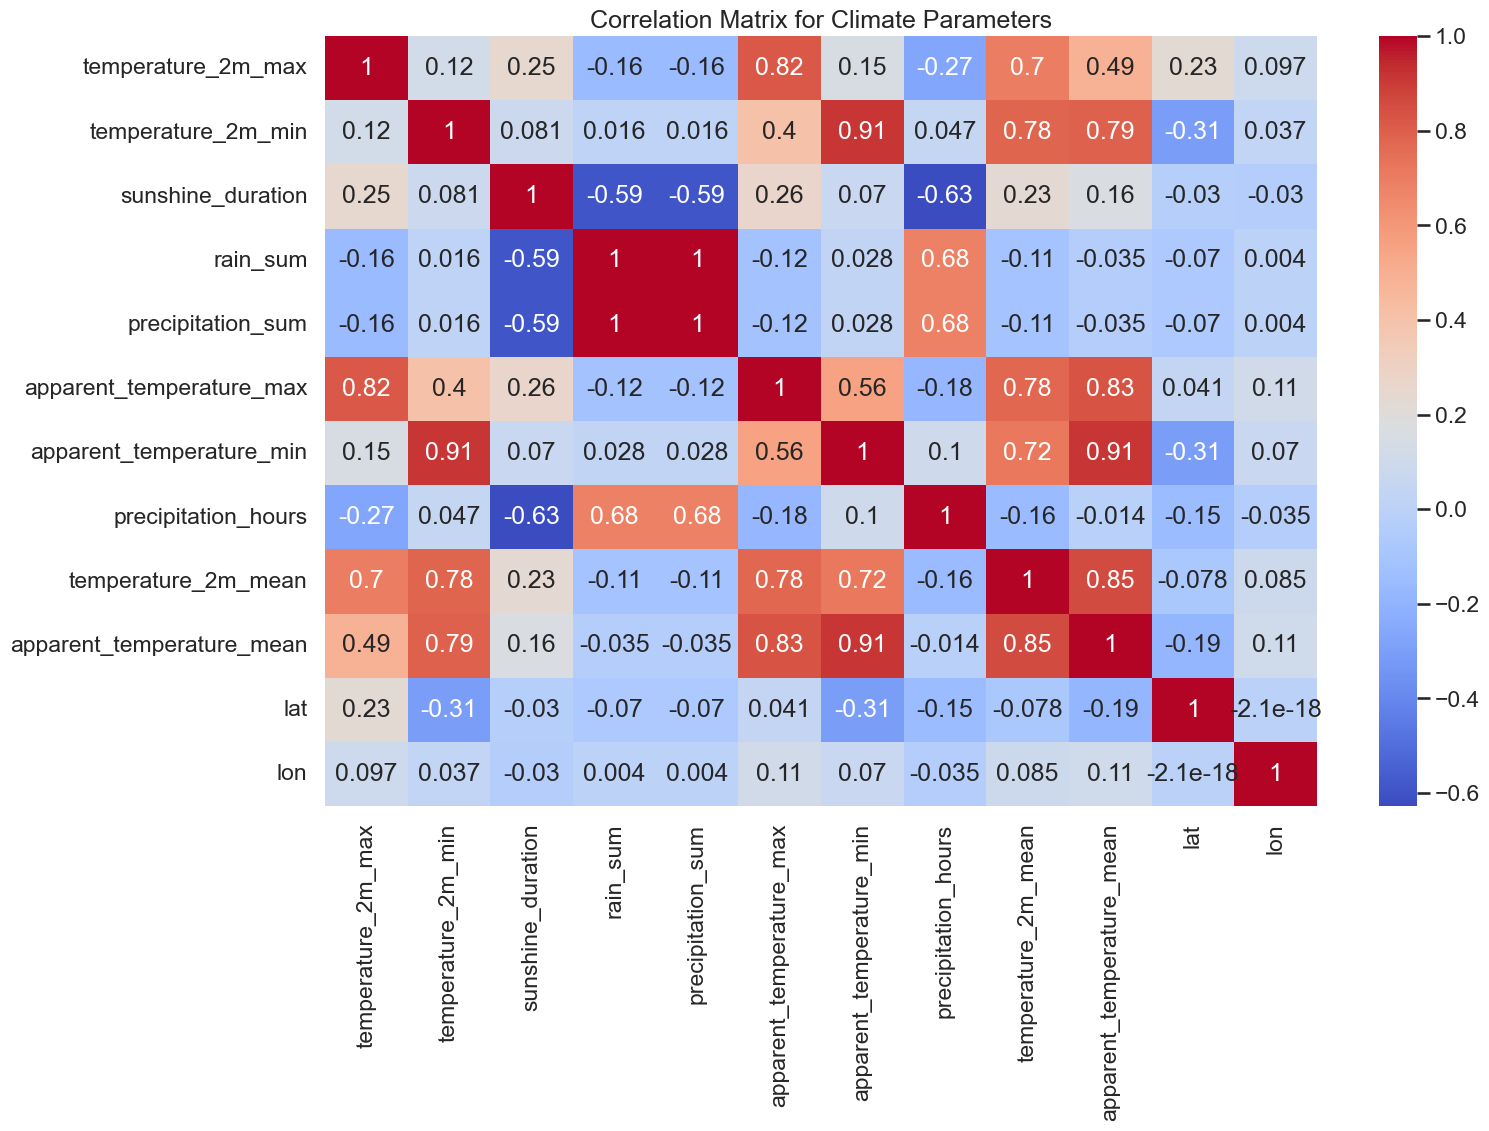

In [235]:
climate_cols = climate.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(16, 10))
sns.heatmap(climate[climate_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Climate Parameters")

In [237]:
climate = climate.drop(columns=["temperature_2m_max","temperature_2m_min", "apparent_temperature_min", "apparent_temperature_max","rain_sum"])

In [239]:
energy['Dates'] = pd.to_datetime(energy['Dates'], format='%d/%m/%Y %H:%M:%S',errors='coerce')

In [241]:
energy.drop(energy[energy['Dates'].dt.year != 2019].index,inplace=True)

In [243]:
energy['Dates']=energy['Dates'].dt.date
energy.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8
4,UP,NR,27.599981,78.050006,2019-01-02,313.9


In [245]:
energy['Dates'] = pd.to_datetime(energy['Dates'], errors='coerce')
energy['Monthly'] = energy['Dates'].dt.to_period('M')
monthly_energy = (
    energy.groupby(['States', 'Monthly'], as_index=True)
          .agg(Usage = ('Usage',  'sum'), latitude = ('latitude','first'), longitude= ('longitude','first'))
          .reset_index()
)

In [247]:
monthly_energy['Monthly'] = monthly_energy['Monthly'].dt.to_timestamp()

In [249]:
monthly_energy.head()

,States,Monthly,Usage,latitude,longitude
0,Andhra Pradesh,2019-01-01,5055.6,14.750429,78.570026
1,Andhra Pradesh,2019-02-01,4524.3,14.750429,78.570026
2,Andhra Pradesh,2019-03-01,5233.8,14.750429,78.570026
3,Andhra Pradesh,2019-04-01,5459.8,14.750429,78.570026
4,Andhra Pradesh,2019-05-01,5052.3,14.750429,78.570026


In [251]:
monthly_energy.to_csv('Monthly Energy.csv', index=False)

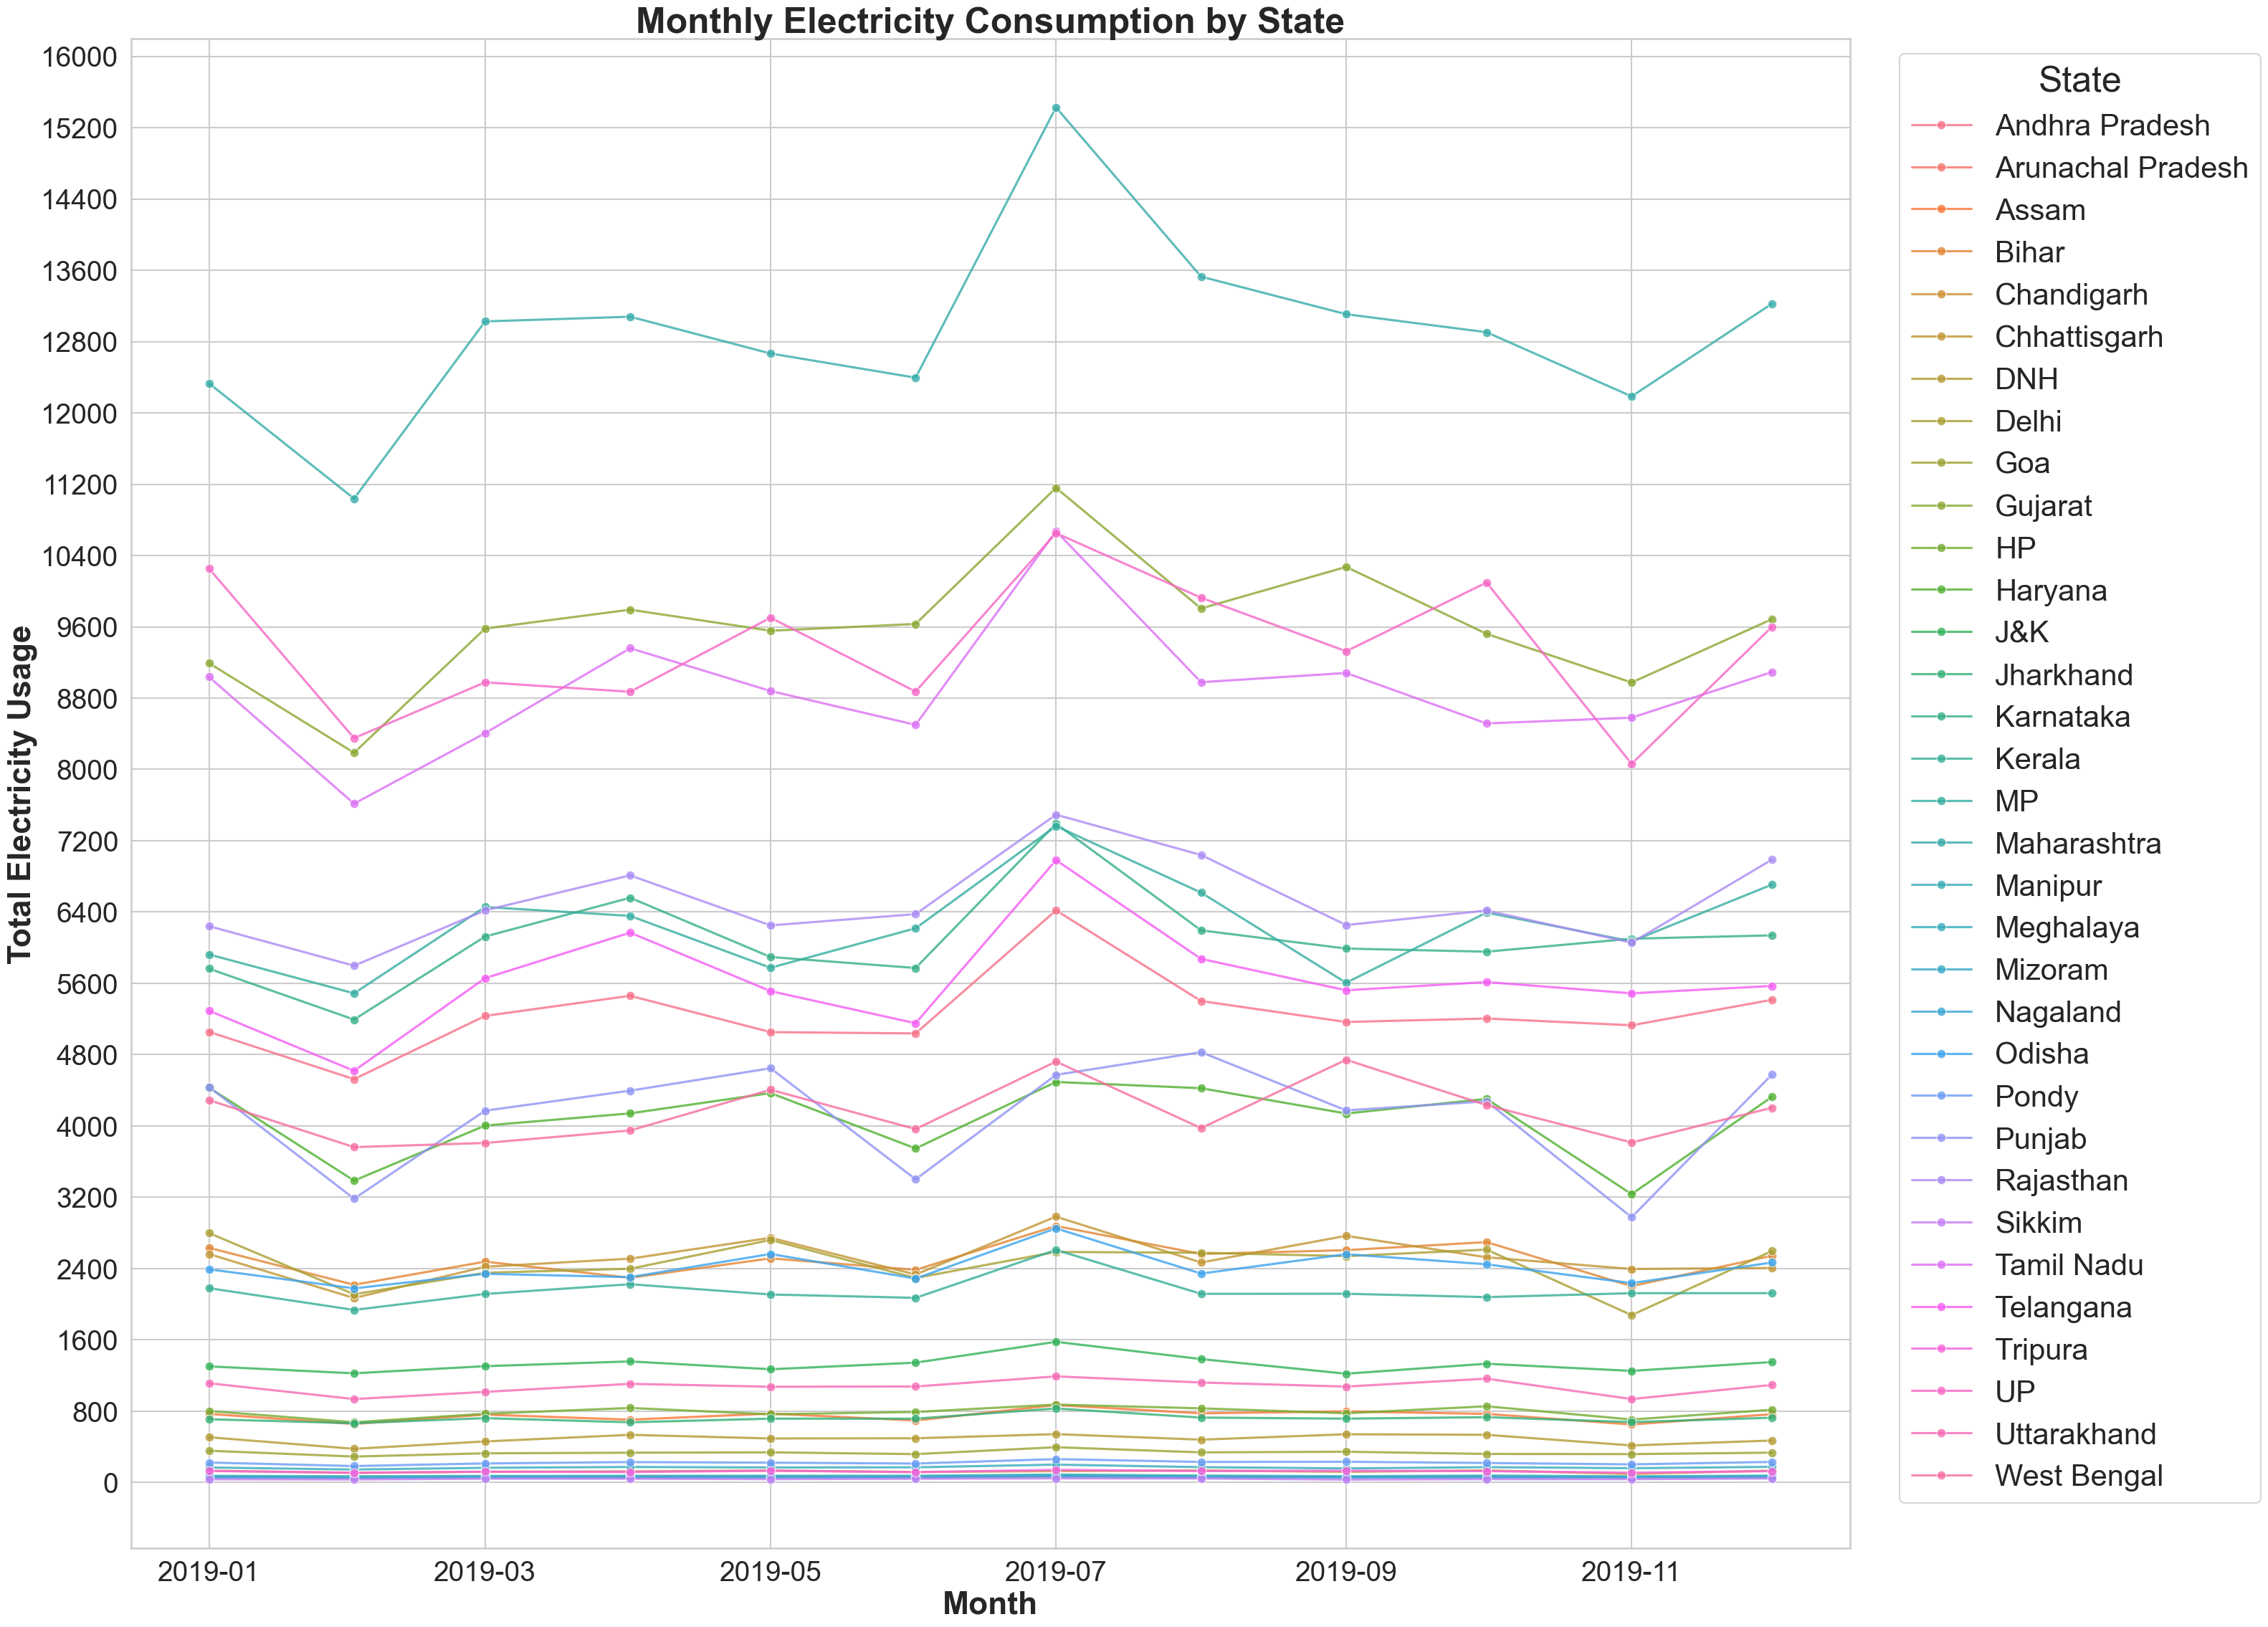

In [359]:
from matplotlib.ticker import MaxNLocator, AutoMinorLocator
fig, ax = plt.subplots(figsize=(32, 24))
sns.lineplot(
    data=monthly_energy,
    x='Monthly',
    y='Usage',
    hue='States',
    marker='o',
    alpha=0.8,
    ax=ax
)
ax.set_title('Monthly Electricity Consumption by State', fontsize=36, weight='bold')
ax.set_xlabel('Month', fontsize=32,weight='bold')
ax.set_ylabel('Total Electricity Usage', fontsize=32, weight='bold')
ax.tick_params(axis='x', labelsize=28)
ax.tick_params(axis='y', labelsize=28)
ax.yaxis.set_major_locator(MaxNLocator(nbins=28))  
ax.legend(
    title='State',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize=30,
    title_fontsize=36
)
plt.tight_layout()
plt.show()

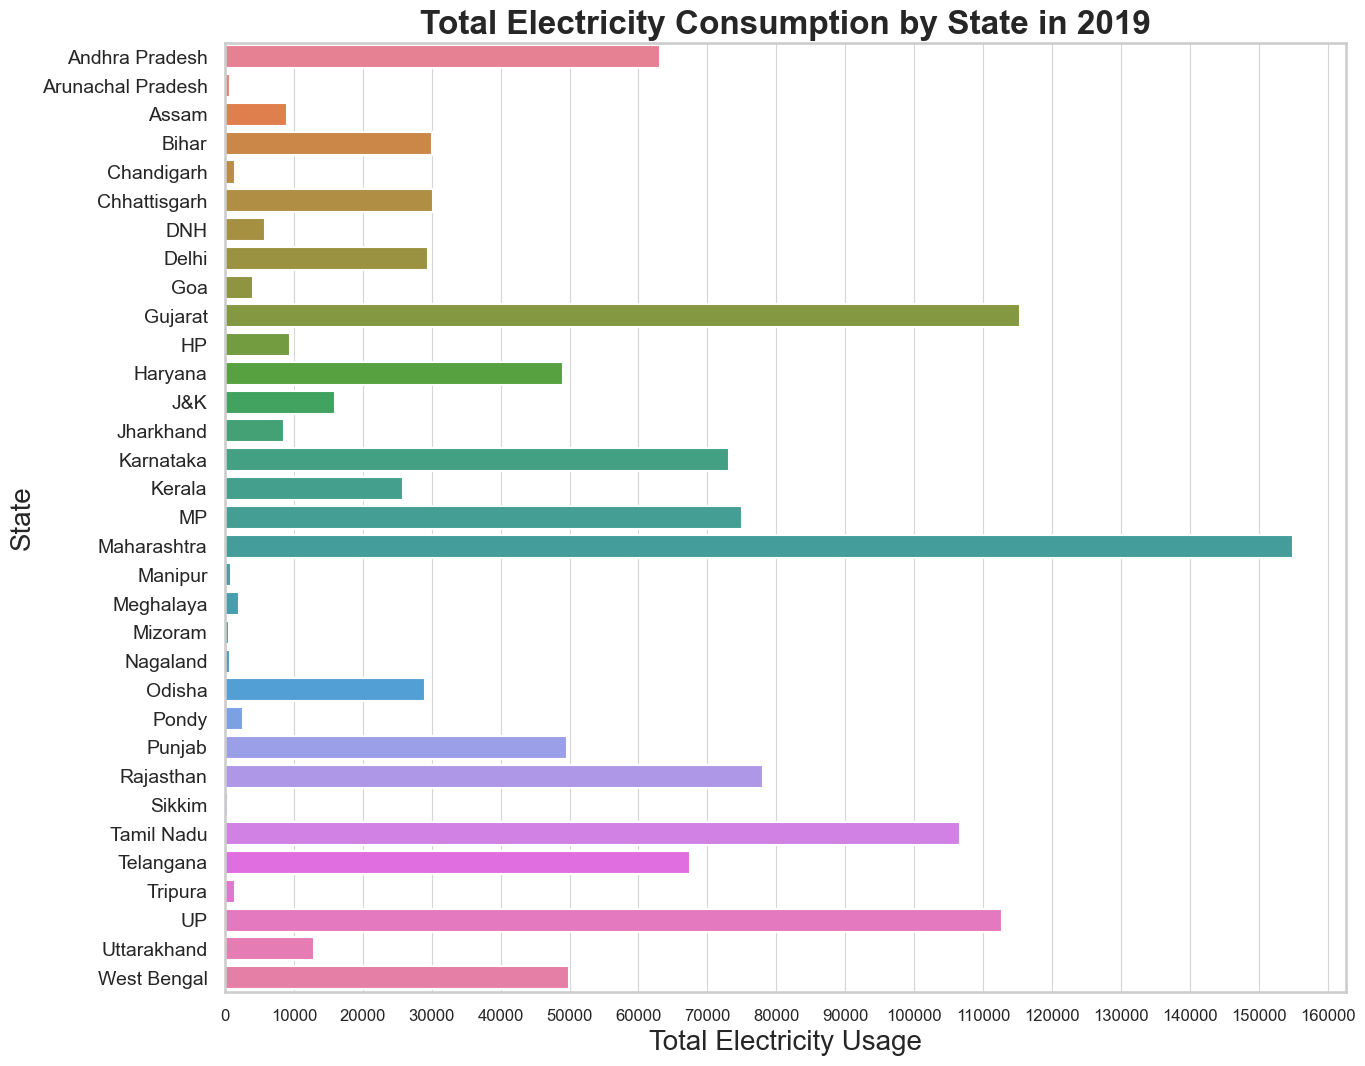

In [426]:
from matplotlib.ticker import MaxNLocator, AutoMinorLocator
yearly = (
    monthly_energy
    .groupby('States', as_index=False)['Usage']
    .sum()
)
fig, ax = plt.subplots(figsize=(14, 11))
sns.barplot(
    data=yearly,
    x='Usage',
    y='States',
    hue='States',
    legend=False,
    ax=ax
)

ax.xaxis.set_major_locator(MaxNLocator(nbins=20))
ax.grid(axis='x', linestyle='-', linewidth=0.8, alpha=0.8)
ax.set_title(f'Total Electricity Consumption by State in 2019', fontsize=24, weight='bold')
ax.set_xlabel('Total Electricity Usage', fontsize=20)
ax.set_ylabel('State', fontsize=20)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()
plt.show()